In [46]:
from typing import Dict, List
from pprint import pprint
from fuzzy_logic.rules import FuzzyRule
from fuzzy_logic.terms import Term
from fuzzy_logic.variables import FuzzyVariable
from fuzzy_logic.mamdani_fs import MamdaniFuzzySystem
from fuzzy_logic.mf import TriangularMF, MembershipFunction
import matplotlib.pyplot as plt
import numpy as np


In [47]:
t1 = Term('mf1', TriangularMF(0, 0, 0.5))
t2 = Term('mf2', TriangularMF(0, 0.5, 1))
t3 = Term('mf3', TriangularMF(0.5, 1, 1))
input1: FuzzyVariable = FuzzyVariable('input1', 0, 1, t1, t2, t3)
input2: FuzzyVariable = FuzzyVariable(
    'input2', 0, 1,
    Term('mf1', TriangularMF(0, 0, 0.5)),
    Term('mf2', TriangularMF(0, 0.5, 1)),
    Term('mf3', TriangularMF(0.5, 1, 1))
)
input3: FuzzyVariable = FuzzyVariable(
    'input3', 0, 1,
    Term('mf1', TriangularMF(0, 0, 0.5)),
    Term('mf2', TriangularMF(0, 0.5, 1)),
    Term('mf3', TriangularMF(0.5, 1, 1))
)
output = FuzzyVariable(
    'output', 0, 1,
    Term('mf1', TriangularMF(0, 0, 0.5)),
    Term('mf2', TriangularMF(0, 0.5, 1)),
    Term('mf3', TriangularMF(0.5, 1, 1))
)

In [48]:
# Строим нечеткую систему
mf: MamdaniFuzzySystem = MamdaniFuzzySystem([input1, input2, input3], [output])

In [49]:
# Строим базу правил
def  enum_term(trm: List[str]) -> List[str]:
    for t in range(len(trm)):
        if trm[-t - 1] == 'L':
            trm[-t - 1] = 'M'
            break
        if trm[-t - 1] == 'M':
            trm[-t - 1] = 'H'
            break
        if trm[-t - 1] == 'H':
            trm[-t - 1] = 'L'
    return trm

d = {'L': 'mf1', 'M': 'mf2', 'H': 'mf3'}
term_value: List[str] = ['L'] * 2
for lt in ['L', 'M', 'H']:
    r: str = 'if '
    for i in range(2 ** 3 + 1):
        r += f'((input1 is {d[term_value[0]]}) and (input2 is {d[term_value[0]]}) and (input3 is {d[lt]}))'
        if i != 8:
            r += ' or '
        term_value = enum_term(term_value)
    r += f' then (output is {d[lt]})'
    pprint(lt)
    pprint(r)
    mf.rules.append(mf.parse_rule(r))

# mf.rules.append(mf.parse_rule('if (input1 is mf1) and (input2 is mf1) then (output is mf1)'))
# mf.rules.append(mf.parse_rule('if (input1 is mf2) and (input2 is mf2) then (output is mf2)'))

'L'
('if ((input1 is mf1) and (input2 is mf1) and (input3 is mf1)) or ((input1 is '
 'mf1) and (input2 is mf1) and (input3 is mf1)) or ((input1 is mf1) and '
 '(input2 is mf1) and (input3 is mf1)) or ((input1 is mf2) and (input2 is mf2) '
 'and (input3 is mf1)) or ((input1 is mf2) and (input2 is mf2) and (input3 is '
 'mf1)) or ((input1 is mf2) and (input2 is mf2) and (input3 is mf1)) or '
 '((input1 is mf3) and (input2 is mf3) and (input3 is mf1)) or ((input1 is '
 'mf3) and (input2 is mf3) and (input3 is mf1)) or ((input1 is mf3) and '
 '(input2 is mf3) and (input3 is mf1)) then (output is mf1)')
'M'
('if ((input1 is mf1) and (input2 is mf1) and (input3 is mf2)) or ((input1 is '
 'mf1) and (input2 is mf1) and (input3 is mf2)) or ((input1 is mf1) and '
 '(input2 is mf1) and (input3 is mf2)) or ((input1 is mf2) and (input2 is mf2) '
 'and (input3 is mf2)) or ((input1 is mf2) and (input2 is mf2) and (input3 is '
 'mf2)) or ((input1 is mf2) and (input2 is mf2) and (input3 is mf2)) or '
 

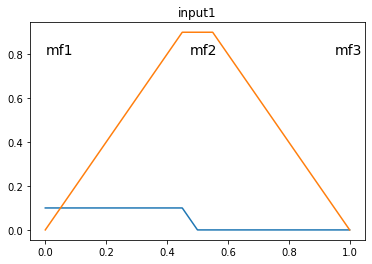

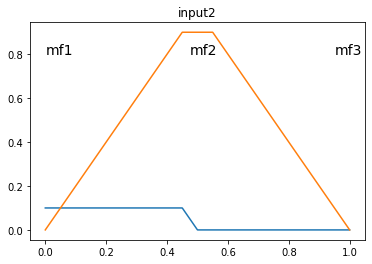

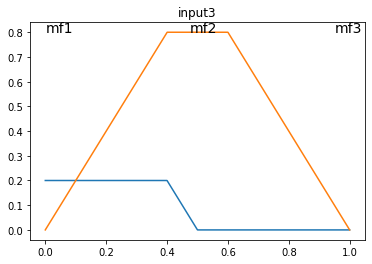

In [50]:
# Выводим графики по уровням

input_values: Dict[FuzzyVariable, float] = {input1: 0.45, input2: 0.45, input3: 0.4}
# 1. Фаззификация
fi: Dict[FuzzyVariable, Dict[Term, float]] = mf.fuzzify(input_values)
for var, terms in fi.items():
    _, ax_plot = plt.subplots()
    for term, value in terms.items():
        x_values: List[float] = [x for x in np.linspace(var.min_value, var.max_value, 1000)]
        y_values: List[float] = []
        for xv in x_values:
            y_values.append(min(value, term.mf.get_value(xv)))
        ax_plot.text(term.mf.x2 - term.mf.x2 * .05, 0.8, term.name, fontsize=14)
        if sum(y_values) != 0:
            ax_plot.plot(x_values, y_values)
    plt.title(f'{var.name}')
    plt.plot()

In [51]:
# Активизация подзаключений

conditions: Dict[FuzzyRule, float] = mf.evaluate_conditions(fi)
for condition, value in conditions.items():
    pprint(f'{condition} -> {value}')

'<fuzzy_logic.rules.FuzzyRule object at 0x121147cc0> -> 0.19999999999999996'
'<fuzzy_logic.rules.FuzzyRule object at 0x121159b70> -> 0.8'
'<fuzzy_logic.rules.FuzzyRule object at 0x121147748> -> 0.0'


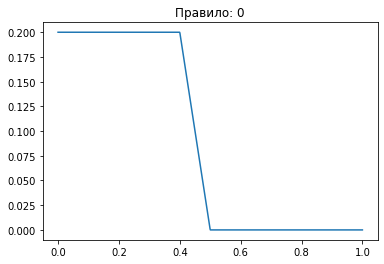

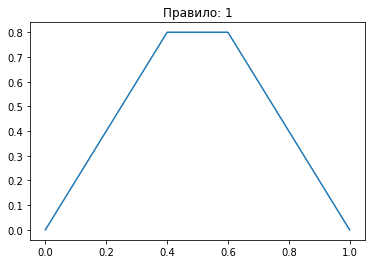

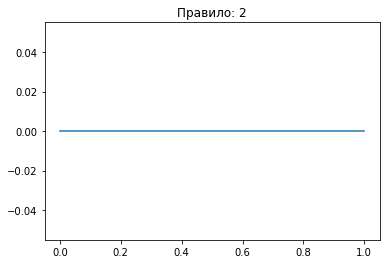

In [52]:
# Заключения правил

conclusions: Dict[FuzzyRule, MembershipFunction] = mf.implicate(conditions)

for rule_id, (conclusion, f) in enumerate(conclusions.items()):
    _, ax_plot = plt.subplots()
    x_values: List[float] = [x for x in np.linspace(0, 1, 1000)]
    y_values: List[float] = [f.get_value(x) for x in x_values]
    ax_plot.plot(x_values, y_values)
    plt.title(f'Правило: {rule_id}')
    plt.plot()

{<fuzzy_logic.variables.FuzzyVariable object at 0x12114ea20>: 0.48947251}


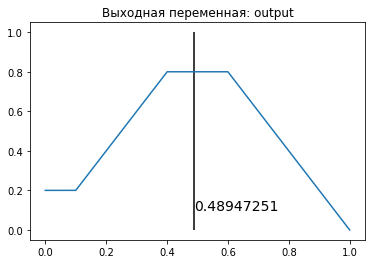

In [53]:
# Результат продукции

fuzzy_result: Dict[FuzzyVariable, MembershipFunction] = mf.aggregate(conclusions)
result: Dict[FuzzyVariable, float] = mf.defuzzify(fuzzy_result)

for fv, value in result.items():
    _, ax_plot = plt.subplots()
    x_values: List[float] = [x for x in np.linspace(0, 1, 1000)]
    y_values: List[float] = [fuzzy_result[fv].get_value(x) for x in x_values]
    ax_plot.plot(x_values, y_values)
    ax_plot.vlines(value, 0, 1)
    ax_plot.text(value, .1, value, fontsize=14)
    plt.title(f'Выходная переменная: {fv.name}')
    plt.plot()


pprint(result)